<a href="https://colab.research.google.com/github/charlottehartline/lab2/blob/main/lab8_milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ACCELERATION.csv to ACCELERATION (26).csv


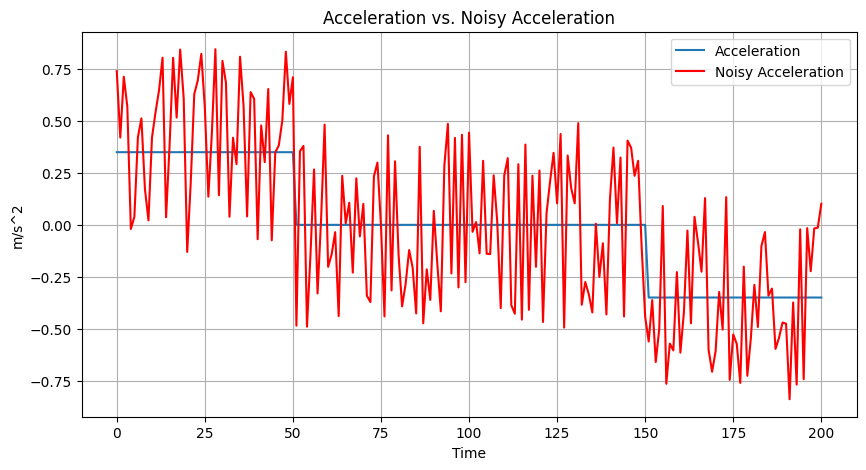

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

timestamp_values = data['timestamp']
acceleration = data['acceleration']
noisy = data['noisyacceleration']


plt.figure(figsize=(10,5))
plt.plot(acceleration, linestyle = '-', label = 'Acceleration')
plt.plot(noisy, label = 'Noisy Acceleration', linestyle = '-', color = 'red')
plt.xlabel('Time')
plt.ylabel('m/s^2')
plt.title('Acceleration vs. Noisy Acceleration')
plt.legend()
plt.grid(True)
plt.show()

Saving ACCELERATION.csv to ACCELERATION (32).csv


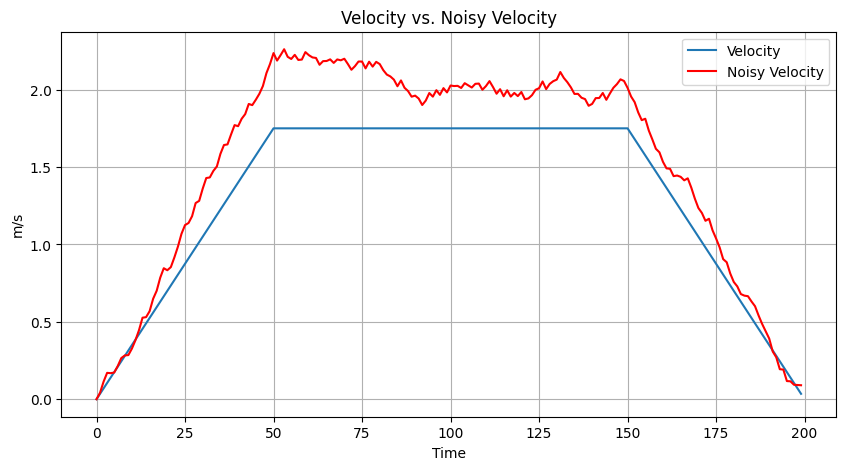

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_values = data['timestamp']
acceleration = data['acceleration']
noisy = data['noisyacceleration']

velocity = []
noisy_velocity = []

velocity.append(0)
noisy_velocity.append(0)
for i in range (1, len(acceleration)-1):
  velocity.append(velocity[i-1] + acceleration[i]*0.1)
  noisy_velocity.append(noisy_velocity[i-1] + noisy[i]*0.1)



plt.figure(figsize=(10,5))
plt.plot(velocity, linestyle = '-', label = 'Velocity')
plt.plot(noisy_velocity, label = 'Noisy Velocity', linestyle = '-', color = 'red')
plt.xlabel('Time')
plt.ylabel('m/s')
plt.title('Velocity vs. Noisy Velocity')
plt.legend()
plt.grid(True)
plt.show()

Saving ACCELERATION.csv to ACCELERATION.csv


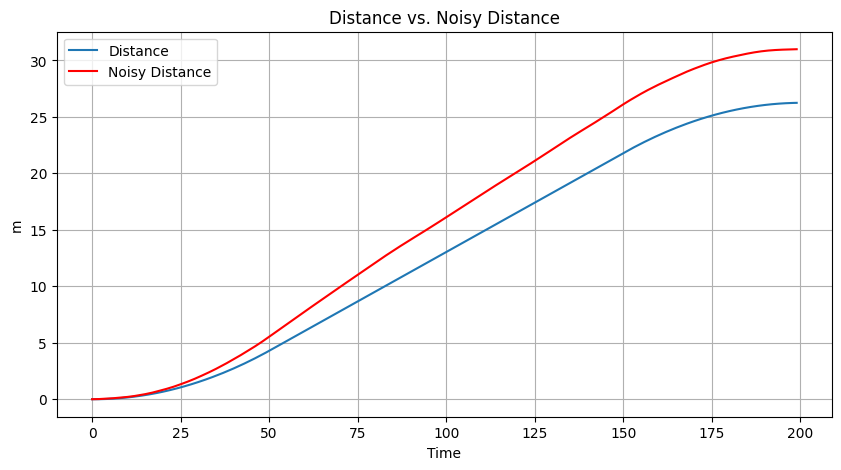

26.24650000000005
30.995430959930033
4.748930959929982


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_values = data['timestamp']
acceleration = data['acceleration']
noisy = data['noisyacceleration']

velocity = []
noisy_velocity = []

velocity.append(0)
noisy_velocity.append(0)
for i in range (1, len(acceleration)-1):
  velocity.append(velocity[i-1] + acceleration[i]*0.1)
  noisy_velocity.append(noisy_velocity[i-1] + noisy[i]*0.1)

distance = []
noisy_distance = []

distance.append(0)
noisy_distance.append(0)
for i in range (1, len(acceleration)-1):
  distance.append(distance[i-1] + velocity[i-1]*0.1)
  noisy_distance.append(noisy_distance[i-1] + noisy_velocity[i]*0.1)




plt.figure(figsize=(10,5))
plt.plot(distance, linestyle = '-', label = 'Distance')
plt.plot(noisy_distance, label = 'Noisy Distance', linestyle = '-', color = 'red')
plt.xlabel('Time')
plt.ylabel('m')
plt.title('Distance vs. Noisy Distance')
plt.legend()
plt.grid(True)
plt.show()

length = len(distance)-1
total_distance = distance[length]
total_noisy_distance = noisy_distance[length]
print(total_distance)
print(total_noisy_distance)
print(total_noisy_distance-total_distance)

Saving WALKING.csv to WALKING (1).csv


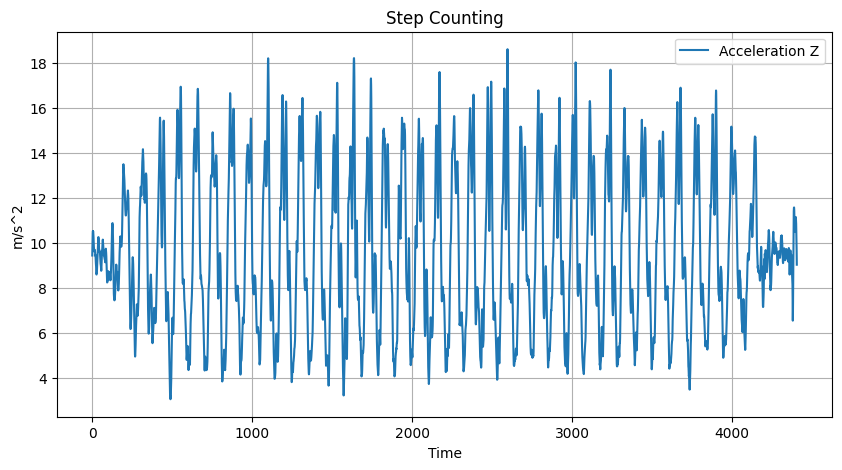

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_values = data['timestamp']
acceleration = data['accel_z']

plt.figure(figsize=(10,5))
plt.plot(acceleration, linestyle = '-', label = 'Acceleration Z')
plt.xlabel('Time')
plt.ylabel('m/s^2')
plt.title('Step Counting')
plt.legend()
plt.grid(True)
plt.show()

Saving WALKING.csv to WALKING (2).csv
37


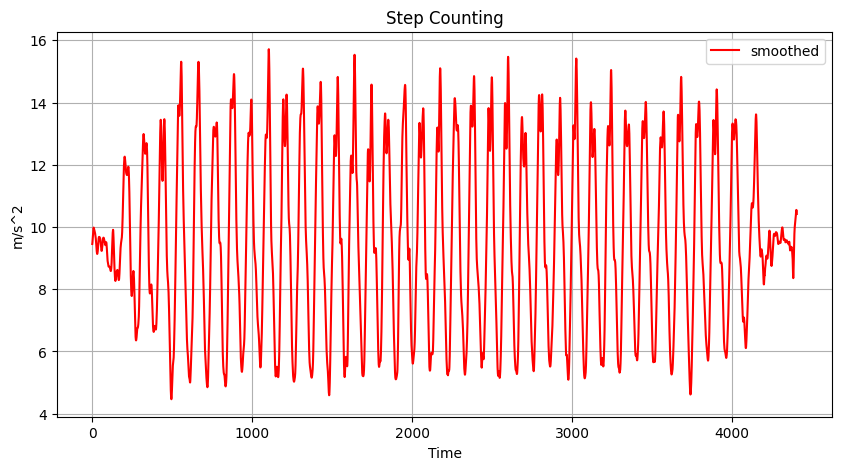

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_values = data['timestamp']
acceleration = data['accel_z']

alpha = 0.1 # set our alpha value for smoothing
smoothing = [] # initialize a new data frame for the smoothed data
smoothing.append(acceleration[0]) # add initial acceleration value (s0 = x0)
for i in range (1, len(acceleration)-1):
  # for each value in acceleration, smooth using the EWMA method
  st = (alpha * acceleration[i]) + ((1-alpha) * smoothing[i-1])
  smoothing.append(st)

count = 0 # initialize count
half = False # checks if the first half of the step occurred
# iterate through the smoothed data
for i in range (1, len(smoothing)-1):
  value = smoothing[i]
  #find which part of the step we are in
  if (value > 10):
    # if in the top half of the step, where acceleration > 10
    half = True
  if (value < 9 and half == True):
    # if in the bottom half of the step and first half already occurred, count the step
    count = count + 1
    half = False # reset the first half to false to find next step

print(count)


plt.figure(figsize=(10,5))
plt.plot(smoothing, linestyle= '-', color = 'red', label = 'smoothed')
plt.xlabel('Time')
plt.ylabel('m/s^2')
plt.title('Step Counting')
plt.legend()
plt.grid(True)
plt.show()

Saving TURNING.csv to TURNING (2).csv
5
[-1.572783851921064, -3.144474108376152, -4.715651875964043, -3.143080726921043, -1.57083880874984]


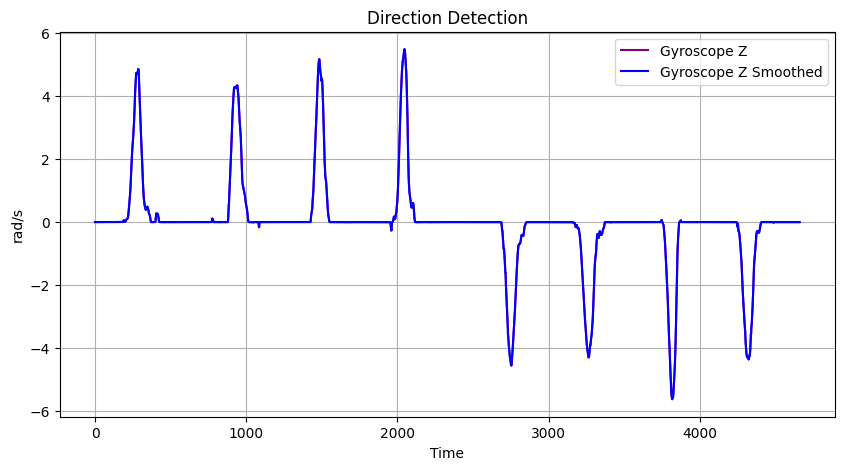

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_values = data['timestamp']
gyro_x = data['gyro_x']
gyro_y = data['gyro_y']
gyro_z = data['gyro_z']


alpha = 0.1 # set our alpha value for smoothing
smoothing = [] # initialize a new data frame for the smoothed data
smoothing.append(gyro_z[0]) # add initial acceleration value (s0 = x0)
for i in range (1, len(acceleration)-1):
  # for each value in acceleration, smooth using the EWMA method
  st = (alpha * gyro_z[i]) + ((1-alpha) * smoothing[i-1])
  smoothing.append(st)

angulardist = []
angulardist.append(gyro_z[0])
for i in range (1, len(gyro_z)-1):
  change_in_seconds = (timestamp_values[i-1]-timestamp_values[i])/1000000000
  angulardist.append(angulardist[i-1] + gyro_z[i-1]*change_in_seconds)

countTurns = 0
indexPrevTurn = 0 #keeps track of previous 90 degree turn
angles = [] #keeps track of angular dist
for i in range (1, len(angulardist)):
  difference = abs(angulardist[indexPrevTurn] - angulardist[i]) #find difference between the turns
  if (difference >= 1.571): #number of radians in a 90 degree turn
      angles.append(angulardist[i]) #add the angle of the turn to angles list
      countTurns = countTurns + 1 #increase number of turns
      indexPrevTurn = i #save the index of this turn

print(countTurns)
print(angles)


plt.figure(figsize=(10,5))
plt.plot(gyro_z, linestyle= '-', color = 'purple', label = 'Gyroscope Z')
plt.plot(gyro_z, linestyle= '-', color = 'blue', label = 'Gyroscope Z Smoothed')
plt.xlabel('Time')
plt.ylabel('rad/s')
plt.title('Direction Detection')
plt.legend()
plt.grid(True)
plt.show()



Saving WALKING_AND_TURNING.csv to WALKING_AND_TURNING (32).csv


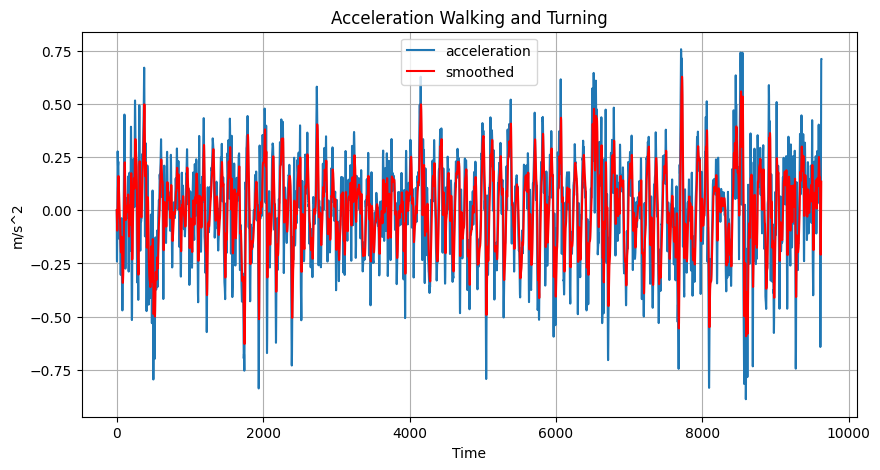

[0.0, -0.21360779, -0.19003296, -0.16567993, -0.14207458, -0.11618042, -0.08534241, -0.053253174, -0.022201538, 0.0026550293, 0.01927185, 0.03413391, 0.047088623, 0.055007935, 0.057388306, 0.05419922, 0.051712036, 0.050323486, 0.048294067, 0.045166016, 0.0438385, 0.047714233, 0.054626465, 0.06588745, 0.08111572, 0.094192505, 0.1081543, 0.11567688, 0.12173462, 0.1257019, 0.1335907, 0.14312744, 0.15022278, 0.15299988, 0.14805603, 0.13586426, 0.117614746, 0.09472656, 0.06437683, 0.029678345, -0.0062561035, -0.045715332, -0.08305359, -0.11778259, -0.14820862, -0.17198181, -0.18972778, -0.20240784, -0.2111206, -0.21705627, -0.21961975, -0.21777344, -0.2066803, -0.18713379, -0.16293335, -0.13748169, -0.11088562, -0.08494568, -0.06297302, -0.054519653, -0.060928345, -0.07923889, -0.1000061, -0.11769104, -0.13362122, -0.14701843, -0.1543274, -0.15196228, -0.1375122, -0.11364746, -0.08163452, -0.05317688, -0.030548096, -0.018218994, -0.019241333, -0.032791138, -0.061294556, -0.09068298, -0.1198

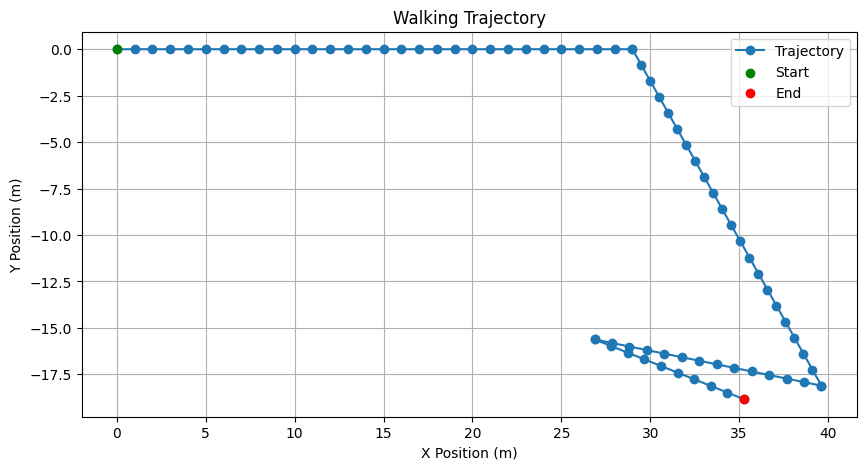

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab import files

uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
timestamp_vals = data['timestamp']
acceleration = data['accel_z']
gyroscope_z = data['gyro_y']

accel = acceleration.tolist()
timestamp_values = timestamp_vals.tolist()
alpha = 0.1
smoothing = []
smoothing.append(accel[0])
for i in range (1, len(accel)-1):
  st = (alpha * accel[i]) + ((1-alpha) * smoothing[i-1])
  smoothing.append(st)

plt.figure(figsize=(10,5))
plt.plot(accel, linestyle = '-', label = 'acceleration')
plt.plot(smoothing, linestyle = '-', color= "red", label = 'smoothed')
plt.xlabel('Time')
plt.ylabel('m/s^2')
plt.title("Acceleration Walking and Turning")
plt.legend()
plt.grid(True)
plt.show()


count = 0
acc = 10
step_indices = []
half = True
for i in range (1, len(smoothing)-1):
  value = smoothing[i]
  if (value > .10):
    half = True
  if (value < -.10 and half == True):
    count = count + 1
    half = False
    step_indices.append(i)


#find angular distance
gyro_z = gyroscope_z.tolist()
print(gyro_z)
angulardist = []
angulardist.append(gyro_z[0])
for i in range (1, len(gyro_z)-1):
  change_in_seconds = (timestamp_values[i-1]-timestamp_values[i])
  angulardist.append(angulardist[i-1] + gyro_z[i-1]*change_in_seconds)


#find turn indices
countTurns = 0
indexPrevTurn = 0 #keeps track of previous 90 degree turn
turn_indices = []
angles = [] #keeps track of angular dist
for i in range (1, len(angulardist)):
  difference = abs(angulardist[indexPrevTurn] - angulardist[i]) #find difference between the turns
  if (difference >= 45): #number of radians in a 45 degree turn
      angles.append(angulardist[i]) #add the angle of the turn to angles list
      countTurns = countTurns + 1 #increase number of turns
      indexPrevTurn = i #save the index of this turn
      turn_indices.append(i)


#combine a list of the indices, keep track of what kind of index, and sort them by index
combined_list = [(index, "step") for index in step_indices] + [(index, "turn") for index in turn_indices]
combined_list.sort(key=lambda x: x[0])

#initialize the start of the path
x, y = 0,0
theta = 0
step_length = 1

trajectory_x = [x]
trajectory_y = [y]

for index, action_type in combined_list:
  if (action_type == "step"):
    #at the step indices, update x and y trajectories
    x = x + step_length * np.cos(theta)
    y = y + step_length * np.sin(theta)
  elif (action_type == "turn"):
    #at the turn indices, change theta value
    theta = theta + angulardist[index]

  trajectory_x.append(x)
  trajectory_y.append(y)




plt.figure(figsize=(10,5))
plt.plot(trajectory_x, trajectory_y, marker='o', label="Trajectory")
plt.scatter(trajectory_x[0], trajectory_y[0], color='green', label='Start', zorder=5)
plt.scatter(trajectory_x[-1], trajectory_y[-1], color='red', label='End', zorder=5)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Walking Trajectory")
plt.legend()
plt.grid(True)
plt.show()